### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import numpy as np
import pandas as pd

# 1. Open the data using read_csv and give it a name complaints

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [3]:
complaints=pd.read_csv('311-service-requests.csv',dtype='unicode')

# 2. What's even in it? (the summary)


In [4]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [5]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [7]:
complaints.sample(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
101937,26450178,10/07/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,ELECTRIC,ELECTRIC-WIRING,RESIDENTIAL BUILDING,10304,23 METCALFE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.61625111423896,-74.08604285185618,"(40.61625111423896, -74.08604285185618)"
63740,26505623,10/17/2013 12:00:00 AM,NaN,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10453,2249 MORRIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.85721749956804,-73.90248235927109,"(40.85721749956804, -73.90248235927109)"
100787,26450483,10/07/2013 10:53:25 AM,10/08/2013 08:47:31 AM,DOB,DOB Inspections - Queens,Construction,Re-Inspect - Rslve Objections,Street Address,11368,108-24 39 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751812425932236,-73.85819222886704,"(40.751812425932236, -73.85819222886704)"
61468,26502669,10/17/2013 02:37:48 PM,10/17/2013 09:09:52 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,11205,172 CLASSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.69481596616376,-73.96128414046092,"(40.69481596616376, -73.96128414046092)"
56521,26511485,10/18/2013 06:35:00 PM,10/21/2013 10:00:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## spaces in column names are replaced with ‘_’

In [8]:
complaints.columns =[column.replace(" ", "_")  for column in complaints.columns]

In [9]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

# 3. Convert the data time columns in the data set from object to datetime format

In [10]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique_Key                      111069 non-null  object
 1   Created_Date                    111069 non-null  object
 2   Closed_Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency_Name                     111069 non-null  object
 5   Complaint_Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location_Type                   79022 non-null   object
 8   Incident_Zip                    98807 non-null   object
 9   Incident_Address                84441 non-null   object
 10  Street_Name                     84432 non-null   object
 11  Cross_Street_1                  84728 non-null   object
 12  Cross_Street_2                

In [11]:
complaints['Created_Date']=pd.to_datetime(complaints['Created_Date'])
complaints['Closed_Date']=pd.to_datetime(complaints['Closed_Date'])
complaints['Due_Date']=pd.to_datetime(complaints['Due_Date'])

In [12]:
complaints['Resolution_Action_Updated_Date']=pd.to_datetime(complaints['Resolution_Action_Updated_Date'])

In [13]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

# 4. Drop all the columns where most of the rows are null. Think logically

In [15]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [16]:
complaints.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Landmark                          110974
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(St

In [17]:
complaints.drop(['Closed_Date','Location_Type','Incident_Zip','Cross_Street_1',
                'Cross_Street_2','Intersection_Street_1','Intersection_Street_2','Landmark',
                'School_Not_Found','School_or_Citywide_Complaint','Vehicle_Type','Taxi_Company_Borough',
                'Taxi_Pick_Up_Location','Bridge_Highway_Name','Bridge_Highway_Direction','Road_Ramp',
                'Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name'], axis=1, inplace=True)

In [18]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Agency                          111069 non-null  object        
 3   Agency_Name                     111069 non-null  object        
 4   Complaint_Type                  111069 non-null  object        
 5   Descriptor                      110613 non-null  object        
 6   Incident_Address                84441 non-null   object        
 7   Street_Name                     84432 non-null   object        
 8   Address_Type                    102247 non-null  object        
 9   City                            98854 non-null   object        
 10  Facility_Type                   19104 non-null   object 

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [19]:
complaints['Complaint_Type'].nunique()

165

In [20]:
complaints.head()

,Unique_Key,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Incident_Address,Street_Name,Address_Type,City,...,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,90-03 169 STREET,169 STREET,ADDRESS,JAMAICA,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,58 AVENUE,58 AVENUE,BLOCKFACE,MASPETH,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,4060 BROADWAY,BROADWAY,ADDRESS,NEW YORK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,WEST 72 STREET,WEST 72 STREET,BLOCKFACE,NEW YORK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,WEST 124 STREET,WEST 124 STREET,BLOCKFACE,NEW YORK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

In [21]:
complaints.loc[:, ['Complaint_Type','Borough']]

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [22]:
complaints=complaints.rename(columns={'Borough':'District'})

In [23]:
complaints.columns

Index(['Unique_Key', 'Created_Date', 'Agency', 'Agency_Name', 'Complaint_Type',
       'Descriptor', 'Incident_Address', 'Street_Name', 'Address_Type', 'City',
       'Facility_Type', 'Status', 'Due_Date', 'Resolution_Action_Updated_Date',
       'Community_Board', 'District', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

# 8. What's the most common complaint type?
display top 10 most common compalin


In [24]:
complaints['Complaint_Type'].value_counts().head(10)

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

#  Plot the top 10 most common compalin

<AxesSubplot:>

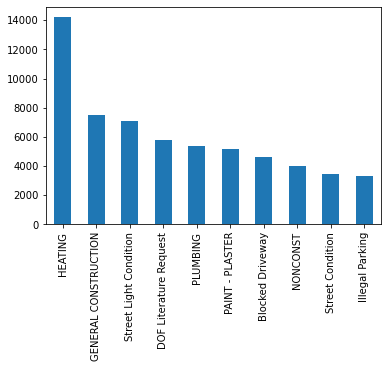

In [25]:
complaint_type=complaints['Complaint_Type'].value_counts().head(10)
complaint_type.plot(kind='bar')

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [26]:
complaints['District'].value_counts().head(10)

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

<AxesSubplot:ylabel='District'>

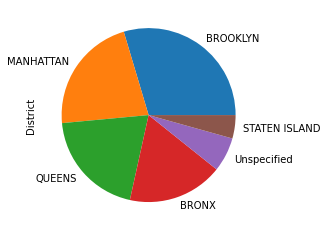

In [29]:
district=complaints['District'].value_counts().head(10)
district.plot(kind='pie')

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [31]:
new_complaint=complaints.query('Complaint_Type=="Illegal Parking" & District=="QUEENS"').head(10)

In [32]:
new_complaint

,Unique_Key,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Incident_Address,Street_Name,Address_Type,City,...,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Latitude,Longitude,Location
1,26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,58 AVENUE,58 AVENUE,BLOCKFACE,MASPETH,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
116,26591037,2013-10-30 23:20:57,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,133-40 85 STREET,85 STREET,ADDRESS,OZONE PARK,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.67347065165803,-73.8511307325341,"(40.67347065165803, -73.8511307325341)"
117,26592954,2013-10-30 23:20:26,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,197-05A 65 CRESCENT,65 CRESCENT,ADDRESS,FRESH MEADOWS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.73996897148448,-73.7768682381755,"(40.73996897148448, -73.7768682381755)"
140,26592551,2013-10-30 23:01:49,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,77-15 58 AVENUE,58 AVENUE,ADDRESS,MIDDLE VILLAGE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.726633034808366,-73.8835552085296,"(40.726633034808366, -73.8835552085296)"
186,26591575,2013-10-30 22:33:28,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,14-28 CHANDLER STREET,CHANDLER STREET,ADDRESS,FAR ROCKAWAY,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.608860268959695,-73.75593130211928,"(40.608860268959695, -73.75593130211928)"
193,26594762,2013-10-30 22:31:22,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,20-42 125 STREET,125 STREET,ADDRESS,COLLEGE POINT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.78141708195395,-73.84323796414719,"(40.78141708195395, -73.84323796414719)"
253,26592844,2013-10-30 21:46:18,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,NaN,NaN,INTERSECTION,MIDDLE VILLAGE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.7086929311143,-73.8753699708503,"(40.7086929311143, -73.8753699708503)"
284,26592833,2013-10-30 21:27:13,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,NaN,NaN,INTERSECTION,JAMAICA,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.70241414798045,-73.79252032151341,"(40.70241414798045, -73.79252032151341)"
293,26594635,2013-10-30 21:22:34,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,NaN,NaN,INTERSECTION,BAYSIDE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.75439605091989,-73.77719529050601,"(40.75439605091989, -73.77719529050601)"
319,26592819,2013-10-30 21:10:54,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,185-11 WILLIAMSON AVENUE,WILLIAMSON AVENUE,ADDRESS,SPRINGFIELD GARDENS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.680211769230816,-73.75749088965092,"(40.680211769230816, -73.75749088965092)"


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [33]:
new_complaint.loc[:, ['Complaint_Type','District','Created_Date','Descriptor']].head(3)

,Complaint_Type,District,Created_Date,Descriptor
1,Illegal Parking,QUEENS,2013-10-31 02:01:04,Commercial Overnight Parking
116,Illegal Parking,QUEENS,2013-10-30 23:20:57,Blocked Hydrant
117,Illegal Parking,QUEENS,2013-10-30 23:20:26,Posted Parking Sign Violation


# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [35]:
new_complaint.to_csv('New_Complaint.csv', index=False)

In [36]:
complaints_new=pd.read_csv('New_Complaint.csv', index_col=0)
complaints_new.head()

,Created_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Incident_Address,Street_Name,Address_Type,City,Facility_Type,...,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Latitude,Longitude,Location
Unique_Key,,,,,,,,,,,,,,,,,,,,,
26593698,2013-10-31 02:01:04,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,58 AVENUE,58 AVENUE,BLOCKFACE,MASPETH,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26591037,2013-10-30 23:20:57,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,133-40 85 STREET,85 STREET,ADDRESS,OZONE PARK,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.673471,-73.851131,"(40.67347065165803, -73.8511307325341)"
26592954,2013-10-30 23:20:26,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,197-05A 65 CRESCENT,65 CRESCENT,ADDRESS,FRESH MEADOWS,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.739969,-73.776868,"(40.73996897148448, -73.7768682381755)"
26592551,2013-10-30 23:01:49,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,77-15 58 AVENUE,58 AVENUE,ADDRESS,MIDDLE VILLAGE,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.726633,-73.883555,"(40.726633034808366, -73.8835552085296)"
26591575,2013-10-30 22:33:28,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,14-28 CHANDLER STREET,CHANDLER STREET,ADDRESS,FAR ROCKAWAY,Precinct,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,40.608860,-73.755931,"(40.608860268959695, -73.75593130211928)"
